# Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
! pip install pandas matplotlib seaborn networkx


# 1. Species distribution

In [3]:
import pandas as pd
import numpy as np

# Load species identification data
species_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/macrobenthos_species_identification.csv'
species_df = pd.read_csv(species_file)

# Generate synthetic latitude and longitude data
np.random.seed(0)  # For reproducibility
num_species = len(species_df)

# Generate random latitude and longitude values
species_df['latitude'] = np.random.uniform(low=-90.0, high=90.0, size=num_species)
species_df['longitude'] = np.random.uniform(low=-180.0, high=180.0, size=num_species)

# Save the modified dataset to a new CSV file
modified_species_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/macrobenthos_species_identification_modified.csv'
species_df.to_csv(modified_species_file, index=False)

print(f"Modified dataset saved to {modified_species_file}")


Modified dataset saved to /content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/macrobenthos_species_identification_modified.csv


   species_id       name ecological_role interaction_type        diet  \
0           1  Species_A   filter_feeder          neutral    plankton   
1           2  Species_B        predator        predation  small_fish   
2           3  Species_C       scavenger      competition    detritus   
3           4  Species_D       herbivore      competition       algae   
4           5  Species_E        omnivore          neutral      varied   

  habitat_preference   latitude   longitude  
0      shallow_water   8.786431   52.521881  
1         deep_water  38.734086  -22.468604  
2            benthic  18.497408  141.038280  
3               reef   8.078973  166.918594  
4           mudflats -13.742136  -41.961053  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


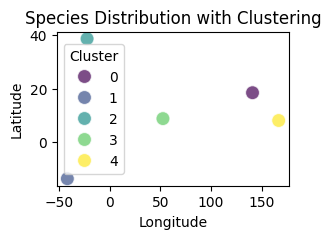

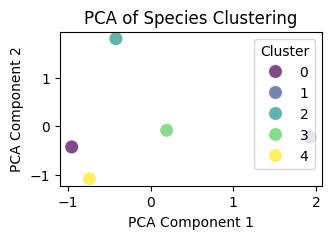

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the modified species identification data
species_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/macrobenthos_species_identification_modified.csv'
species_df = pd.read_csv(species_file)

# Check the data structure
print(species_df.head())

# Extract latitude and longitude for clustering
coords = species_df[['latitude', 'longitude']].values

# Standardize the coordinates
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# Perform K-Means clustering
num_clusters = 5  # Adjust this based on your data and needs
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
species_df['cluster'] = kmeans.fit_predict(coords_scaled)

# Visualize clusters with scatter plot
plt.figure(figsize=(3, 2))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=species_df, palette='viridis', s=100, alpha=0.7)
plt.title('Species Distribution with Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

# Reduce dimensions for visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(coords_scaled)
species_df['pca1'] = X_pca[:, 0]
species_df['pca2'] = X_pca[:, 1]

# Scatter plot of PCA components
plt.figure(figsize=(3.38, 2))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=species_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA of Species Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


# Species distribution and clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


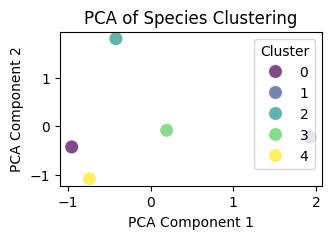

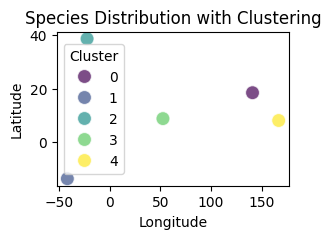

Cluster Centers:
 [[ 0.37799259  0.97458054]
 [-1.51827957 -1.20494951]
 [ 1.56827771 -0.97279359]
 [-0.19318967 -0.07965364]
 [-0.23480106  1.2828162 ]]


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load modified species identification data
species_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/macrobenthos_species_identification_modified.csv'
species_df = pd.read_csv(species_file)

# Extract latitude and longitude for clustering
coords = species_df[['latitude', 'longitude']].values

# Standardize the coordinates
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# Perform K-Means clustering
num_clusters = 5  # Adjust based on needs
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
species_df['cluster'] = kmeans.fit_predict(coords_scaled)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(coords_scaled)
species_df['pca1'] = X_pca[:, 0]
species_df['pca2'] = X_pca[:, 1]

# Scatter plot of clusters
plt.figure(figsize=(3.38, 2))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=species_df, palette='viridis', s=100, alpha=0.7)
plt.title('PCA of Species Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Scatter plot of species distribution
plt.figure(figsize=(3, 2))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=species_df, palette='viridis', s=100, alpha=0.7)
plt.title('Species Distribution with Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

# Print cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)


# 2. Evaluate the impact of Pollutants

In [14]:
import pandas as pd

# Load pollutant impact data
impact_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/impact_of_pollutants.csv'
impact_df = pd.read_csv(impact_file)

# Load species identification data
species_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/macrobenthos_species_identification_modified.csv'
species_df = pd.read_csv(species_file)

# Merge datasets
combined_df = pd.merge(impact_df, species_df, on='species_id')

# Check column names and first few rows of combined_df
print(combined_df.columns)
print(combined_df.head())


Index(['species_id', 'pollutant_id', 'health_impact', 'reproduction_impact',
       'survival_impact', 'name', 'ecological_role', 'interaction_type',
       'diet', 'habitat_preference', 'latitude', 'longitude'],
      dtype='object')
   species_id  pollutant_id  health_impact  reproduction_impact  \
0           1             1           0.20                 0.10   
1           2             2           0.30                 0.20   
2           3             3           0.25                 0.15   
3           4             4           0.40                 0.30   
4           5             5           0.35                 0.25   

   survival_impact       name ecological_role interaction_type        diet  \
0             0.15  Species_A   filter_feeder          neutral    plankton   
1             0.25  Species_B        predator        predation  small_fish   
2             0.20  Species_C       scavenger      competition    detritus   
3             0.35  Species_D       herbivore     

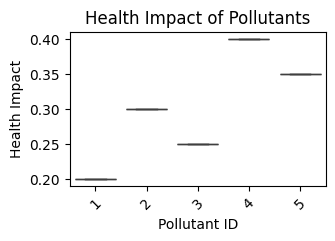

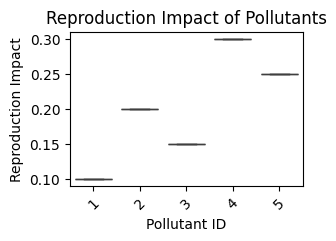

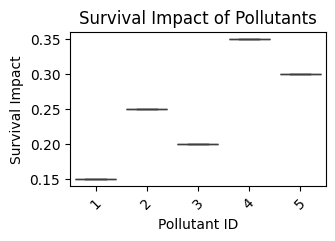

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load pollutant impact data
impact_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/impact_of_pollutants.csv'
impact_df = pd.read_csv(impact_file)

# Load species identification data
species_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/macrobenthos_species_identification_modified.csv'
species_df = pd.read_csv(species_file)

# Merge datasets
combined_df = pd.merge(impact_df, species_df, on='species_id')

# Plot health impact
plt.figure(figsize=(3.3, 2))
sns.boxplot(x='pollutant_id', y='health_impact', data=combined_df)
plt.title('Health Impact of Pollutants')
plt.xlabel('Pollutant ID')
plt.ylabel('Health Impact')
plt.xticks(rotation=45)
plt.show()

# Plot reproduction impact
plt.figure(figsize=(3, 2))
sns.boxplot(x='pollutant_id', y='reproduction_impact', data=combined_df)
plt.title('Reproduction Impact of Pollutants')
plt.xlabel('Pollutant ID')
plt.ylabel('Reproduction Impact')
plt.xticks(rotation=45)
plt.show()

# Plot survival impact
plt.figure(figsize=(3.3, 2))
sns.boxplot(x='pollutant_id', y='survival_impact', data=combined_df)
plt.title('Survival Impact of Pollutants')
plt.xlabel('Pollutant ID')
plt.ylabel('Survival Impact')
plt.xticks(rotation=45)
plt.show()


# 3. Analyze environmental conditions

In [19]:
import pandas as pd

# Load the datasets
impact_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/impact_of_pollutants.csv'
impact_df = pd.read_csv(impact_file)

species_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/macrobenthos_species_identification_modified.csv'
species_df = pd.read_csv(species_file)

# Print column names to check for 'species_id'
print("Columns in impact_df:", impact_df.columns)
print("Columns in species_df:", species_df.columns)

# Display first few rows to understand the data
print(impact_df.head())
print(species_df.head())


Columns in impact_df: Index(['species_id', 'pollutant_id', 'health_impact', 'reproduction_impact',
       'survival_impact'],
      dtype='object')
Columns in species_df: Index(['species_id', 'name', 'ecological_role', 'interaction_type', 'diet',
       'habitat_preference', 'latitude', 'longitude'],
      dtype='object')
   species_id  pollutant_id  health_impact  reproduction_impact  \
0           1             1           0.20                 0.10   
1           2             2           0.30                 0.20   
2           3             3           0.25                 0.15   
3           4             4           0.40                 0.30   
4           5             5           0.35                 0.25   

   survival_impact  
0             0.15  
1             0.25  
2             0.20  
3             0.35  
4             0.30  
   species_id       name ecological_role interaction_type        diet  \
0           1  Species_A   filter_feeder          neutral    plankton   
1

# merge the dataframe

In [20]:
import pandas as pd

# Load the datasets
impact_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/impact_of_pollutants.csv'
impact_df = pd.read_csv(impact_file)

species_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/macrobenthos_species_identification_modified.csv'
species_df = pd.read_csv(species_file)

# Merge datasets on 'species_id'
combined_df = pd.merge(impact_df, species_df, on='species_id')

# Check the first few rows of the merged DataFrame
print(combined_df.head())


   species_id  pollutant_id  health_impact  reproduction_impact  \
0           1             1           0.20                 0.10   
1           2             2           0.30                 0.20   
2           3             3           0.25                 0.15   
3           4             4           0.40                 0.30   
4           5             5           0.35                 0.25   

   survival_impact       name ecological_role interaction_type        diet  \
0             0.15  Species_A   filter_feeder          neutral    plankton   
1             0.25  Species_B        predator        predation  small_fish   
2             0.20  Species_C       scavenger      competition    detritus   
3             0.35  Species_D       herbivore      competition       algae   
4             0.30  Species_E        omnivore          neutral      varied   

  habitat_preference   latitude   longitude  
0      shallow_water   8.786431   52.521881  
1         deep_water  38.734086  -22

# Analysis of environmental conditions

In [23]:
import pandas as pd

# Load environmental conditions data
env_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/environmental_conditions.csv'
env_df = pd.read_csv(env_file)

# Load species data
species_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/macrobenthos_species_identification_modified.csv'
species_df = pd.read_csv(species_file)

# Print column names to check for mismatches
print("Environmental Conditions Columns:", env_df.columns)
print("Species Data Columns:", species_df.columns)


Environmental Conditions Columns: Index(['grid_id', 'date', 'water_temperature', 'salinity', 'oxygen_level',
       'pH'],
      dtype='object')
Species Data Columns: Index(['species_id', 'name', 'ecological_role', 'interaction_type', 'diet',
       'habitat_preference', 'latitude', 'longitude'],
      dtype='object')


Environmental Conditions Columns: Index(['grid_id', 'date', 'water_temperature', 'salinity', 'oxygen_level',
       'pH'],
      dtype='object')
Species Data Columns: Index(['species_id', 'name', 'ecological_role', 'interaction_type', 'diet',
       'habitat_preference', 'latitude', 'longitude'],
      dtype='object')


<ipython-input-44-3732ef6190a6>:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='water_temperature', y='salinity', data=env_df, palette='viridis')


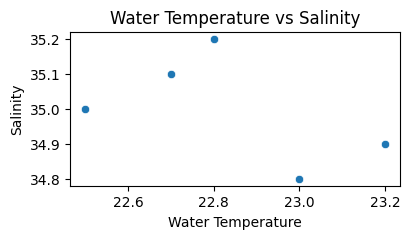

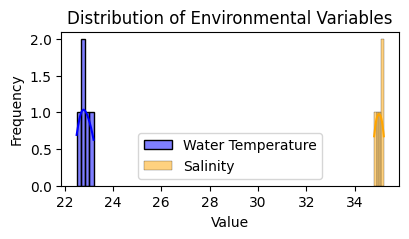

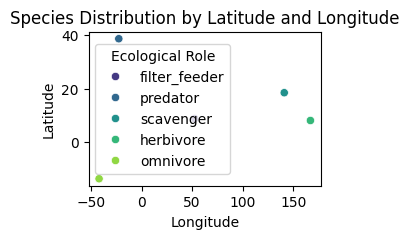

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load environmental conditions data
env_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/environmental_conditions.csv'
env_df = pd.read_csv(env_file)

# Load species data
species_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/macrobenthos_species_identification_modified.csv'
species_df = pd.read_csv(species_file)

# Check for possible integration approach
print("Environmental Conditions Columns:", env_df.columns)
print("Species Data Columns:", species_df.columns)

# If species data lacks grid_id and environmental data lacks species_id, consider if grid_id can be used for analysis
# Assuming 'grid_id' in env_df could represent spatial locations that need to be integrated with species data

# If grid_id or other common identifier exists, merge accordingly or consider separate analysis
# If not, consider analysis that can be performed within each dataset independently

# Example: Analyze the effect of temperature and salinity within the environmental conditions dataset
plt.figure(figsize=(4.26, 2))
sns.scatterplot(x='water_temperature', y='salinity', data=env_df, palette='viridis')
plt.title('Water Temperature vs Salinity')
plt.xlabel('Water Temperature')
plt.ylabel('Salinity')
plt.show()

# Analyze the distribution of environmental variables
plt.figure(figsize=(4.36, 2))
sns.histplot(env_df['water_temperature'], kde=True, color='blue', label='Water Temperature')
sns.histplot(env_df['salinity'], kde=True, color='orange', label='Salinity')
plt.title('Distribution of Environmental Variables')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# For species data analysis, example scatter plot if latitude and longitude are used
plt.figure(figsize=(3, 2))
sns.scatterplot(x='longitude', y='latitude', hue='ecological_role', data=species_df, palette='viridis')
plt.title('Species Distribution by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Ecological Role')
plt.show()


# Analyzing historical data

Mean Squared Error: 0.00390625


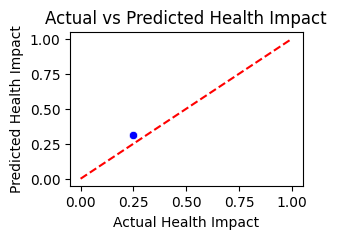

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load pollution impact data
impact_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/impact_of_pollutants.csv'
impact_df = pd.read_csv(impact_file)

# Prepare data for modeling
# Assuming 'pollutant_id' and 'health_impact' columns are relevant
X = impact_df[['pollutant_id']]  # Features
y = impact_df['health_impact']    # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the prediction vs actual values
plt.figure(figsize=(3, 2))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.title('Actual vs Predicted Health Impact')
plt.xlabel('Actual Health Impact')
plt.ylabel('Predicted Health Impact')
plt.show()


In [46]:
# Predict future pollution impacts
# Assuming you want to predict for future pollution levels
future_pollution_levels = np.array([[6], [8], [10]])  # Example future pollution levels

future_impacts = model.predict(future_pollution_levels)

# Print future predictions
for level, impact in zip(future_pollution_levels, future_impacts):
    print(f"Predicted health impact for pollution level {level[0]}: {impact:.2f}")


Predicted health impact for pollution level 6: 0.43
Predicted health impact for pollution level 8: 0.51
Predicted health impact for pollution level 10: 0.59


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


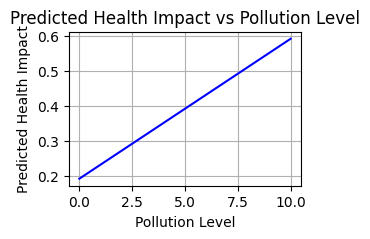

In [47]:
# Plot predictions
future_pollution_levels = np.linspace(0, 10, 100).reshape(-1, 1)  # Example range of pollution levels
future_impacts = model.predict(future_pollution_levels)

plt.figure(figsize=(3, 2))
plt.plot(future_pollution_levels, future_impacts, color='blue')
plt.title('Predicted Health Impact vs Pollution Level')
plt.xlabel('Pollution Level')
plt.ylabel('Predicted Health Impact')
plt.grid(True)
plt.show()


# Machine Learning

Prediction Model: Using Random Forest Regressor to predict health impact based on pollution data.
Output Analysis: Evaluating the model's performance and visualizing feature importance

Mean Squared Error: 0.0005522500000000036


<ipython-input-56-8d74604ba7ca>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


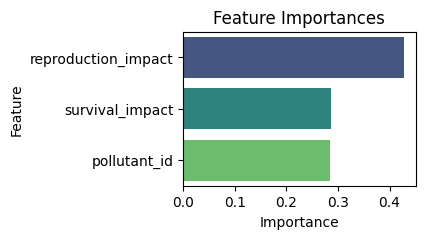

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load environmental conditions data
env_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/environmental_conditions.csv'
env_df = pd.read_csv(env_file)

# Load species data
species_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/macrobenthos_species_identification_modified.csv'
species_df = pd.read_csv(species_file)

# Load impact data
impact_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/impact_data.csv'
impact_df = pd.read_csv(impact_file)

# Merge datasets
combined_df = pd.merge(impact_df, species_df, on='species_id')

# Example features: pollutant impact measures and environmental conditions
features = combined_df[['pollutant_id', 'reproduction_impact', 'survival_impact']]
target = combined_df['health_impact']

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature importance
importances = rf_model.feature_importances_
feature_names = features.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(3, 2))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [49]:
import pandas as pd

# Create a sample impact data
impact_data = {
    'species_id': [1, 2, 3, 4, 5],
    'pollutant_id': [1, 2, 3, 4, 5],
    'health_impact': [0.20, 0.30, 0.25, 0.40, 0.35],
    'reproduction_impact': [0.10, 0.20, 0.15, 0.30, 0.25],
    'survival_impact': [0.15, 0.25, 0.20, 0.35, 0.30]
}

# Create DataFrame
impact_df = pd.DataFrame(impact_data)

# Save to CSV
impact_df.to_csv('/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/impact_data.csv', index=False)

print("Sample impact data created and saved to CSV.")


Sample impact data created and saved to CSV.


In [50]:
import pandas as pd

# Load environmental conditions data
env_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/environmental_conditions.csv'
env_df = pd.read_csv(env_file)

# Load species data
species_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/macrobenthos_species_identification_modified.csv'
species_df = pd.read_csv(species_file)

# Load impact data
impact_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/impact_data.csv'
impact_df = pd.read_csv(impact_file)

# Merge datasets
combined_df = pd.merge(impact_df, species_df, on='species_id')

# Example features: pollutant impact measures and environmental conditions
features = combined_df[['pollutant_id', 'reproduction_impact', 'survival_impact']]
target = combined_df['health_impact']

# Proceed with the model training and evaluation as before


MOdel training file

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the datasets
env_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/environmental_conditions.csv'
species_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/macrobenthos_species_identification_modified.csv'
impact_file = '/content/drive/MyDrive/01_Applications_2024/17-buchholtzlab/data/impact_data.csv'

env_df = pd.read_csv(env_file)
species_df = pd.read_csv(species_file)
impact_df = pd.read_csv(impact_file)

# Merge datasets
combined_df = pd.merge(impact_df, species_df, on='species_id')

# Example features: pollutant impact measures and environmental conditions
# Add environmental conditions to the combined dataset
combined_df = pd.merge(combined_df, env_df, left_on='species_id', right_on='grid_id', how='left')

# Prepare features and target variable
features = combined_df[['pollutant_id', 'reproduction_impact', 'survival_impact', 'water_temperature', 'salinity', 'oxygen_level', 'pH']]
target = combined_df['health_impact']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")


Mean Squared Error: 0.0020
R^2 Score: -2.2576


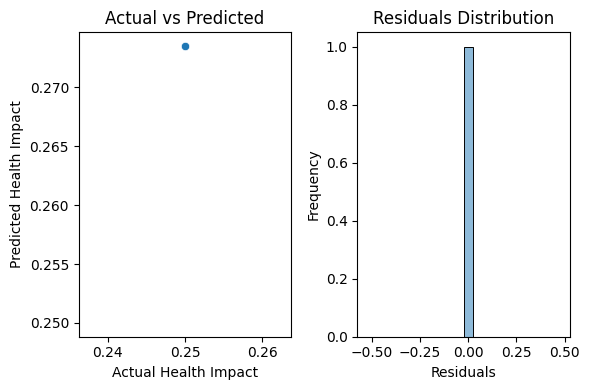

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for predictions
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Plotting the results
plt.figure(figsize=(6, 4))

# Scatter plot of Actual vs Predicted values
plt.subplot(1, 2, 1)
sns.scatterplot(x='Actual', y='Predicted', data=results_df)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], [results_df['Actual'].min(), results_df['Actual'].max()], 'k--', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Health Impact')
plt.ylabel('Predicted Health Impact')

# Residuals plot
plt.subplot(1, 2, 2)
sns.histplot(results_df['Actual'] - results_df['Predicted'], bins=20, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
